In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Fonksyon

In [117]:
#barplot kantite liv yo
def bar_kantite(x,y,df,tit,color):
    ax = sns.barplot(x=x, y=y, data=df,palette=color)
    ax.set_xlabel('Nombre de livres ')
    plt.title(tit)
    sns.despine(left=True, bottom=True)


    for p in ax.patches:
            percentage =  p.get_width()
            x = p.get_x() + p.get_width()/1
            y = p.get_y() + p.get_height()/1.5
            ax.annotate(int(percentage), (x, y),fontsize=10,color="black")

In [118]:
#barplot pousantaj liv  yo
def bar_pousantaj(x,y,df,tit,color):
    ax = sns.barplot(x=x, y=y, data=df,palette=color)
    ax.set_xlabel('Nombre de livres ')
    plt.title(tit)
    sns.despine(left=True, bottom=True)

    total = df[x].sum(axis=0)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y),fontsize=10,color="black")

In [119]:
# pie plot ak pousantaj
def pie_plot(df,x,y,tit):
    df[x].plot(kind='pie',autopct="%.1f%%",labels=df[y])
    plt.title(tit, fontsize=15)

In [120]:
# efase varyab ki nil yo
def del_kategori_nil(df,x,df1):
    dfindex=df[df[x]==0].index
    df1=df.drop(dfindex)

### Data Preparation

In [121]:
#li fichye a
df1 = pd.read_csv('Informations_generales_3.csv')

In [122]:
df1.head()

Biblio  Nbre_livres  \
0  Centre Culturel et de Recherche pour l'épanoui...         2680   
1                        Amis Lecteurs de Port Salut         1512   
2                                       Bibliotaptap         1466   
3                          Centre Culturel Pyepoudre         5229   
4                       Bibliothèque Monique Calixte        17617   

   nbr_livres_etr  nbr_livres_ht  generalite  generalht  philosophie  philoht  \
0            1494           1186          62         16          139       20   
1            1512              0          52          0           21        0   
2             931            535           0          0           27        0   
3            5229              0         104          0           74        0   
4           13765           3852         343         39          304       37   

   religion  religionht  ...  Poesie  poesieht  Théâtre  teyatht  Biographie  \
0        54           7  ...       0         0        0        0          63   
1        25           0  ...     109         0        6        0           0   
2         7           2  ...      33        84       17        7           0   
3        31           0  ...     585         0       41        0           0   
4        60          39  ...     342       505      570       64         257   

   Biographie_ht   BD  BD_ht  Albums  Albums_ht  
0             23    0      0       0          0  
1              0    0      0       0          0  
2              0    0      0       0          0  
3              0    0      0       0          0  
4             75  495    318    1941        114  

[5 rows x 40 columns]

In [123]:
df1.columns

Index(['Biblio', 'Nbre_livres', 'nbr_livres_etr', 'nbr_livres_ht',
       'generalite', 'generalht', 'philosophie', 'philoht', 'religion',
       'religionht', 'scssociales', 'socialeht', 'langues ', 'langht',
       'scsnature', 'scsnatureht', 'technique', 'techniqueht', 'art', 'art ht',
       'Litt', 'litht', 'geohist', 'geohist ht', 'Roman', 'Romanht', 'Romanj',
       'Romanjht', 'Conte', 'conteht', 'Poesie', 'poesieht', 'Théâtre',
       'teyatht', 'Biographie', 'Biographie_ht', 'BD', 'BD_ht', 'Albums',
       'Albums_ht'],
      dtype='object')

In [124]:
#lis tout kategori ki etranje ak non biblio yo
listet=['Biblio','generalite','philosophie','religion','scssociales','langues ','scsnature','technique','art','Litt','geohist','Roman','Romanj','Conte','Poesie','Théâtre','Biographie','BD','Albums']

In [125]:
#lis tout kategori ki etranje
listet2=['generalite','philosophie','religion','scssociales','langues ','scsnature','technique','art','Litt','geohist','Roman','Romanj','Conte','Poesie','Théâtre','Biographie','BD','Albums']

In [126]:
listnbliv=['Nbre_livres', 'nbr_livres_etr', 'nbr_livres_ht']

In [127]:
listht=['Biblio','generalht','philoht','religionht','socialeht','langht','scsnatureht','techniqueht','art ht','litht','geohist ht','Romanht','Romanjht','conteht','poesieht','teyatht','Biographie_ht','BD_ht','Albums_ht']

In [128]:
listht2=['generalht','philoht','religionht','socialeht','langht','scsnatureht','techniqueht','art ht','litht','geohist ht','Romanht','Romanjht','conteht','poesieht','teyatht','Biographie_ht','BD_ht','Albums_ht']

In [129]:
#dataframe kategori etranje yo
df3=df1[listet]

In [130]:
#dataframe kategori ayisyen yo
df4=df1[listht]

In [131]:
#dataframe distribisyon anndan chak biblio
df5=df1.T

In [132]:
df5.head()

0   \
Biblio          Centre Culturel et de Recherche pour l'épanoui...   
Nbre_livres                                                  2680   
nbr_livres_etr                                               1494   
nbr_livres_ht                                                1186   
generalite                                                     62   

                                         1             2   \
Biblio          Amis Lecteurs de Port Salut  Bibliotaptap   
Nbre_livres                            1512          1466   
nbr_livres_etr                         1512           931   
nbr_livres_ht                             0           535   
generalite                               52             0   

                                       3                             4   \
Biblio          Centre Culturel Pyepoudre  Bibliothèque Monique Calixte   
Nbre_livres                          5229                         17617   
nbr_livres_etr                       5229                         13765   
nbr_livres_ht                           0                          3852   
generalite                            104                           343   

                                                      5   \
Biblio          Bibliothèque Communautaire Deschapelles    
Nbre_livres                                         3907   
nbr_livres_etr                                      2582   
nbr_livres_ht                                       1325   
generalite                                           116   

                                           6   \
Biblio          Bibliothèque Aux Trois Dumas.   
Nbre_livres                              6439   
nbr_livres_etr                           5853   
nbr_livres_ht                             586   
generalite                                240   

                                                           7   \
Biblio          Bibliothèque Communautaire de Fond des Blancs   
Nbre_livres                                               790   
nbr_livres_etr                                            790   
nbr_livres_ht                                               0   
generalite                                                 30   

                                                            8   \
Biblio          Bibliothèque Jacques Roumain de Carice: BIJARC   
Nbre_livres                                                827   
nbr_livres_etr                                             827   
nbr_livres_ht                                                0   
generalite                                                  35   

                                                          9   \
Biblio          Bibliothèque Jean François Brierre de Pestel   
Nbre_livres                                             1711   
nbr_livres_etr                                          1122   
nbr_livres_ht                                            589   
generalite                                                44   

                                              10                         11  \
Biblio          Centre Culturel Katherine Dunham  Bibliothèque RASIN LESPWA   
Nbre_livres                                 7750                       3566   
nbr_livres_etr                              6186                       2448   
nbr_livres_ht                               1564                       1118   
generalite                                   139                        156   

                                                               12  \
Biblio          Bibliothèque Jean Valbrune Bresil de Fond-pari...   
Nbre_livres                                                  4276   
nbr_livres_etr                                               2952   
nbr_livres_ht                                                1324   
generalite                                                    105   

                                               13  
Biblio          Bibliothèque de l'IPDEC des Cayes  
Nbre_li

In [133]:
listcol=df1['Biblio'].to_list()

In [134]:
df5.set_axis(listcol, axis='columns', inplace=True)

In [135]:
df5.drop(['Biblio'],inplace=True)

In [136]:
df5['Varyab'] = df5.index

In [137]:
df5.reset_index(drop=True, inplace=True)

In [138]:
colbiblio=['CCREJ','Port-Salut','Taptap','Pyepoudre','BMC','Deschapelles','Trois_Dumas','Fond-des-Blancs','BIJARC','Pestel','CCKD','Rasin_lespwa','Fond-parisien','IPDEC','varyab']

In [139]:
colbiblio2=['CCREJ','Port-Salut','Taptap','Pyepoudre','BMC','Deschapelles','Trois_Dumas','Fond-des-Blancs','BIJARC','Pestel','CCKD','Rasin_lespwa','Fond-parisien','IPDEC']

In [140]:
colbiblioht=['CCREJ','Taptap','BMC','Deschapelles','Trois_Dumas','Pestel','CCKD','Rasin_lespwa','Fond-parisien','IPDEC']

In [141]:
df5.columns=colbiblio

In [142]:
df5['nbr_cat']=df5[colbiblio2].sum(axis=1)

In [143]:
df6=df5.drop([0, 1,2])

In [144]:
df6[['Pestel','varyab']]

Pestel         varyab
3      44     generalite
4       6      generalht
5      35    philosophie
6       0        philoht
7      11       religion
8       1     religionht
9     309    scssociales
10    232      socialeht
11     33       langues 
12      3         langht
13     28      scsnature
14      2    scsnatureht
15     49      technique
16      3    techniqueht
17     11            art
18      8         art ht
19     39           Litt
20     21          litht
21     99        geohist
22     70     geohist ht
23    337          Roman
24    204        Romanht
25     84         Romanj
26      0       Romanjht
27     10          Conte
28      9        conteht
29     27         Poesie
30     26       poesieht
31      6        Théâtre
32      4        teyatht
33      0     Biographie
34      0  Biographie_ht
35      0             BD
36      0          BD_ht
37      0         Albums
38      0      Albums_ht

In [145]:
#etranje
dfetr=df6.drop([4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38])

In [146]:
#ayisyen
dfht=df6.drop([3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37])

In [147]:
dfht.head()

CCREJ Port-Salut Taptap Pyepoudre  BMC Deschapelles Trois_Dumas  \
4     16          0      0         0   39           23           0   
6     20          0      0         0   37           24           0   
8      7          0      2         0   39           54           0   
10   607          0     85         0  583          201           2   
12    21          0      5         0   71           46           0   

   Fond-des-Blancs BIJARC Pestel CCKD Rasin_lespwa Fond-parisien IPDEC  \
4                0      0      6    7           14             0     0   
6                0      0      0    7            7             2     0   
8                0      0      1   15           22             0     0   
10               0      0    232  429          227           589   435   
12               0      0      3   23           15             0     0   

        varyab  nbr_cat  
4    generalht    105.0  
6      philoht     97.0  
8   religionht    140.0  
10   socialeht   3390.0  
12      langht    184.0

In [148]:
dfetr['nbr_etr']=dfetr[colbiblio2].sum(axis=1)

In [149]:
dfht['nbr_ht']=dfht[colbiblioht].sum(axis=1)

### Analyse

#### Distribution nombre de livres par Biblio

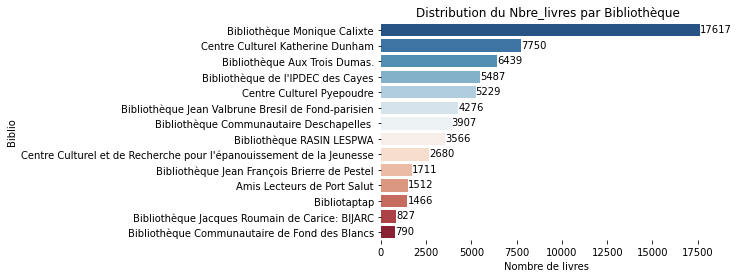

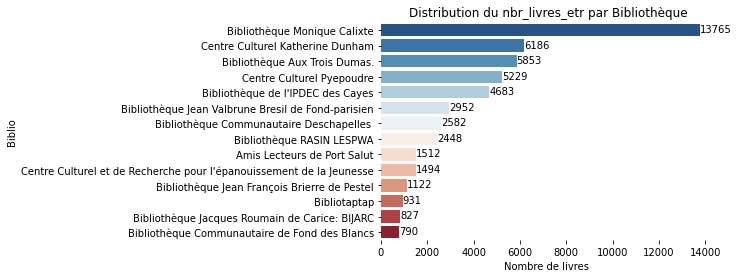

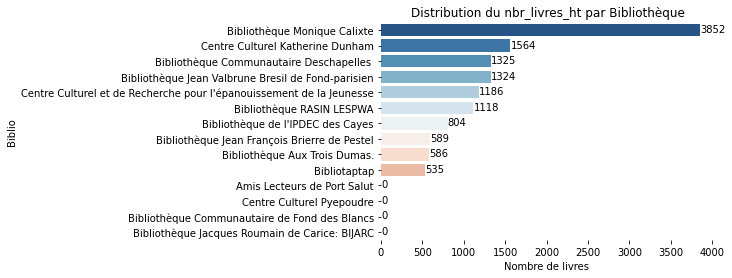

In [150]:
for i in listnbliv:
    df3=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df3,'Distribution du {} par Bibliothèque'.format(i),'RdBu_r')   

#### Distribution nombre de livres par categorie

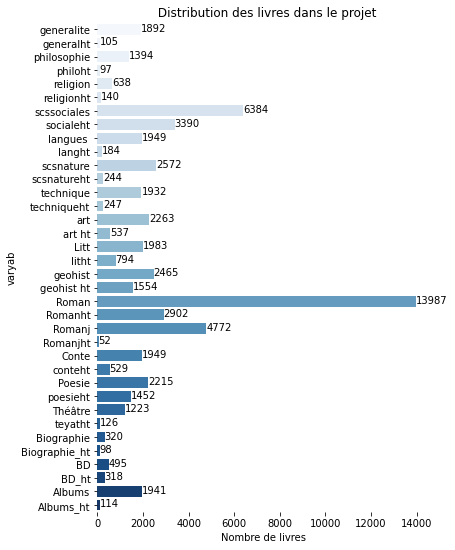

In [151]:
#Distribution en quantité réelle
df10=df6.sort_values(by='nbr_cat', ascending=False)
plt.figure(figsize=(6,9))
bar_kantite(df6['nbr_cat'],'varyab',df6,' Distribution des livres dans le projet','Blues') 

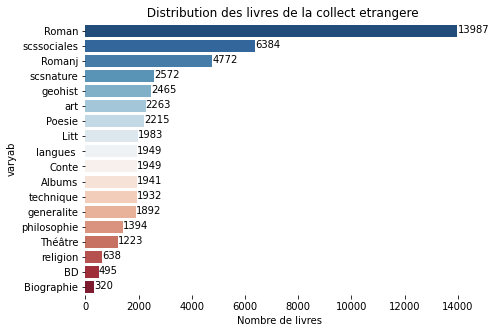

In [152]:
#Distribution en quantité réelle
df11=dfetr.sort_values(by='nbr_etr', ascending=False)
plt.figure(figsize=(7,5))
bar_kantite(df11['nbr_etr'],'varyab',df11,' Distribution des livres de la collect etrangere','RdBu_r') 

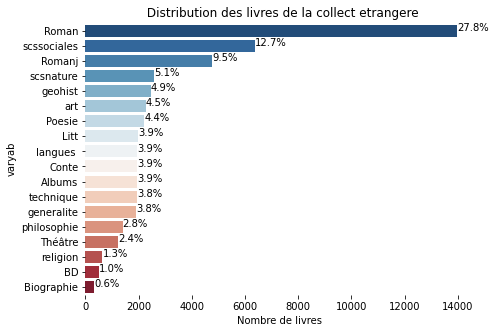

In [153]:
plt.figure(figsize=(7,5))
bar_pousantaj('nbr_etr','varyab',df11,' Distribution des livres de la collect etrangere','RdBu_r')

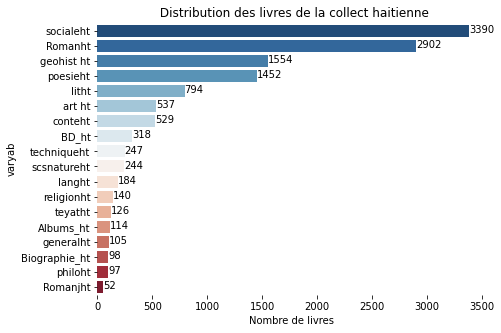

In [154]:
#Distribution en quantité réelle
df12=dfht.sort_values(by='nbr_ht', ascending=False)
plt.figure(figsize=(7,5))
bar_kantite(df12['nbr_ht'],'varyab',df12,' Distribution des livres de la collect haitienne','RdBu_r') 

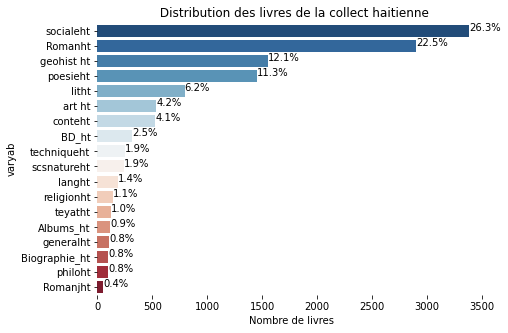

In [155]:
#Distribution en quantité réelle
plt.figure(figsize=(7,5))
bar_pousantaj('nbr_ht','varyab',df12,' Distribution des livres de la collect haitienne','RdBu_r') 


#### Distribution Categorie etrangere par Biblio

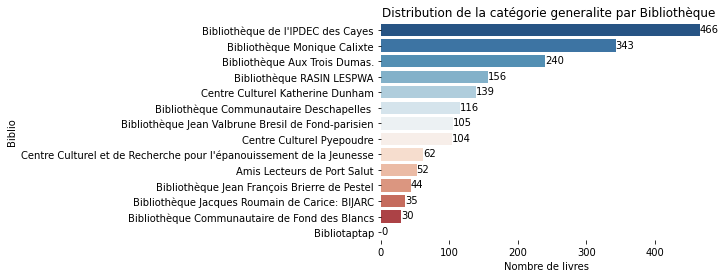

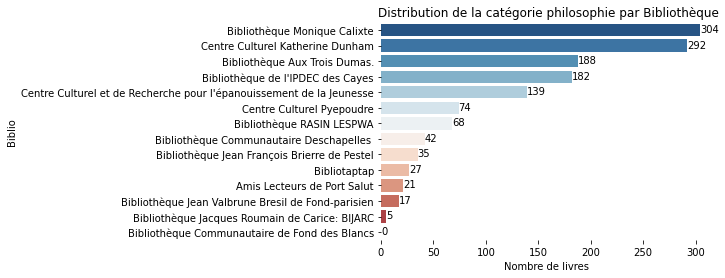

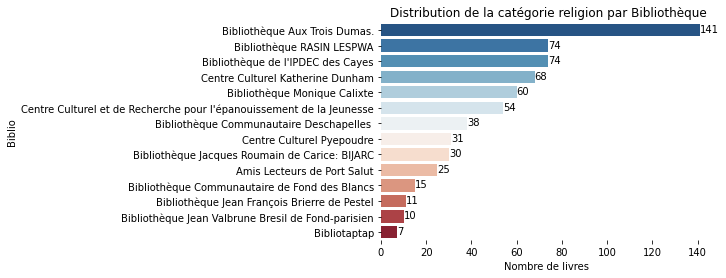

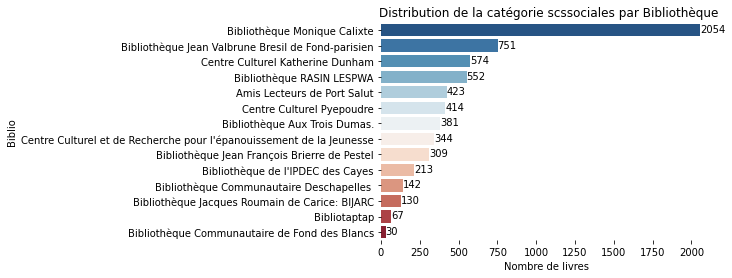

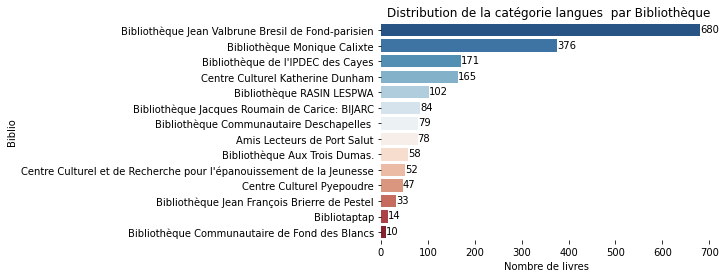

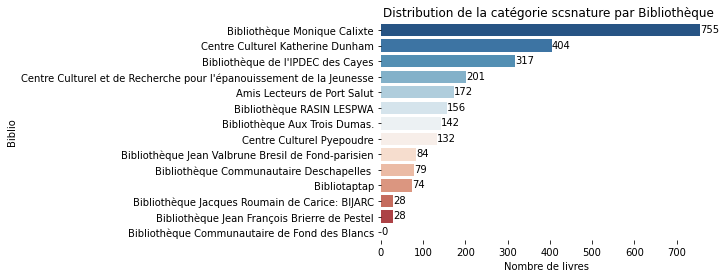

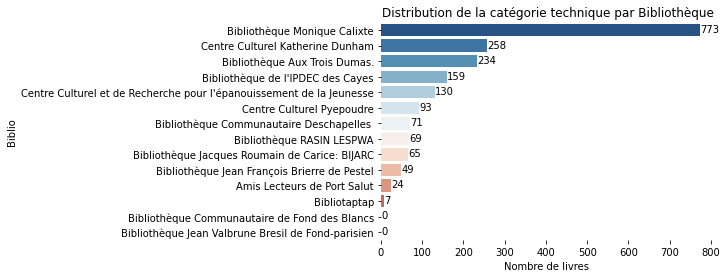

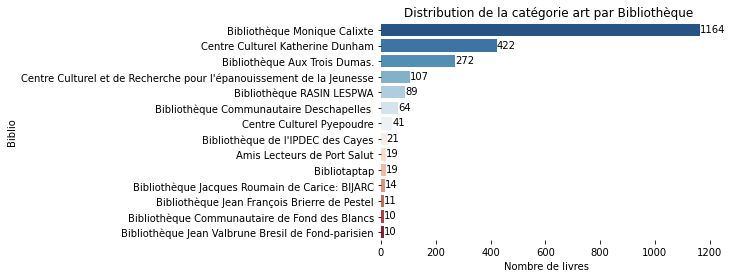

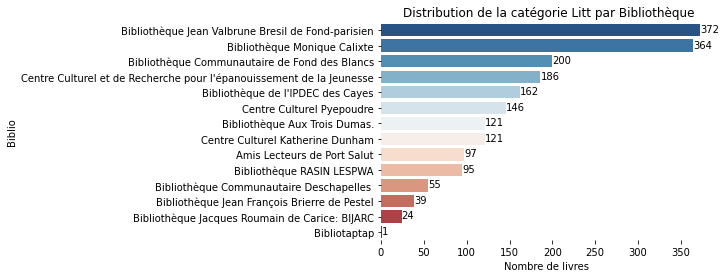

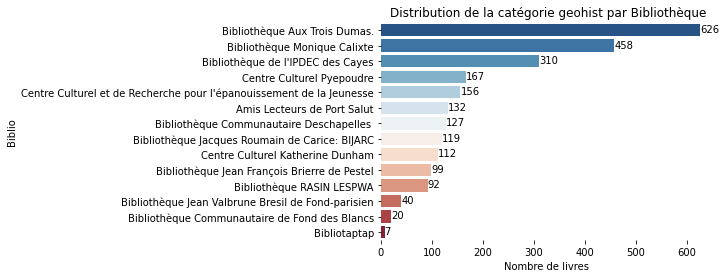

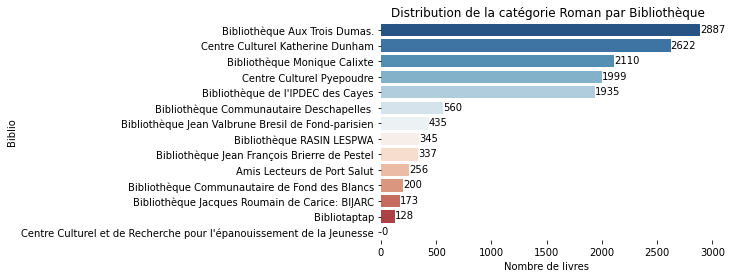

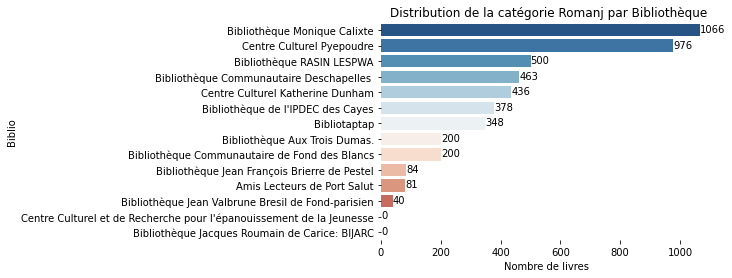

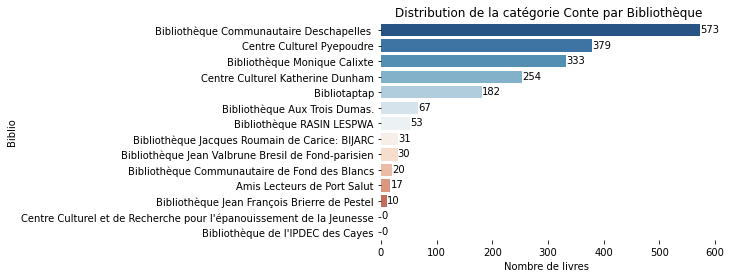

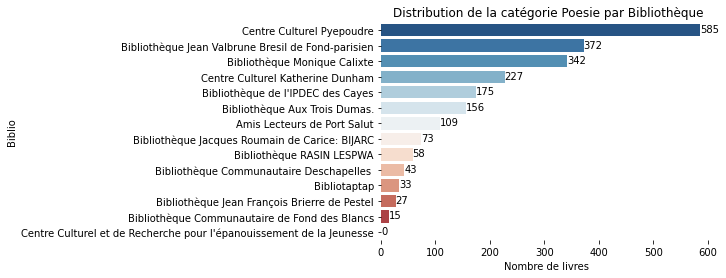

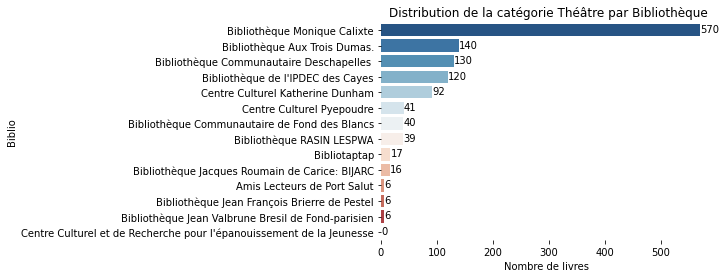

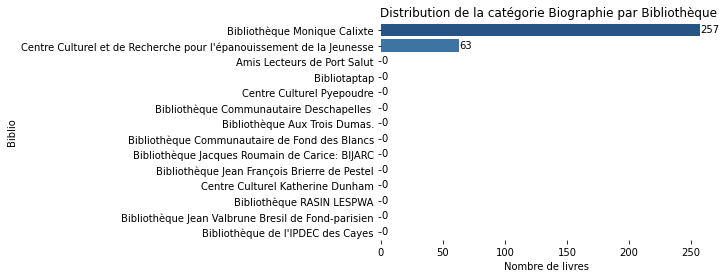

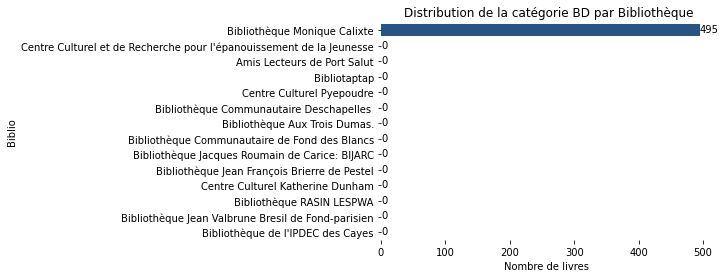

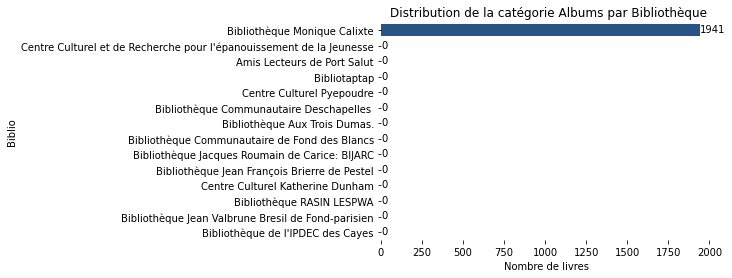

In [156]:
#Distribution en quantité réelle
for i in listet2:
    df20=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df20,'Distribution de la catégorie {} par Bibliothèque'.format(i),'RdBu_r')   

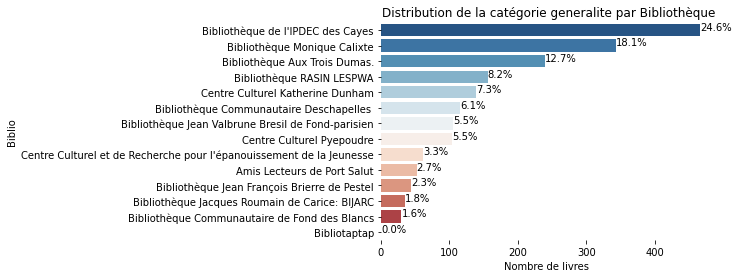

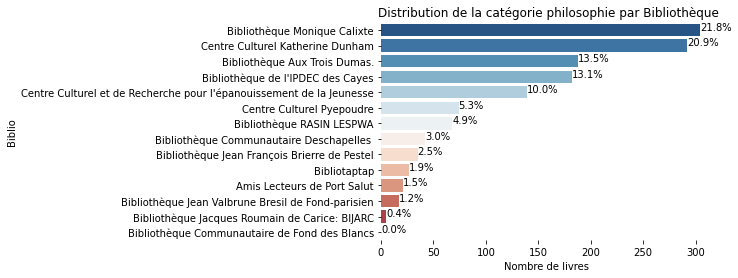

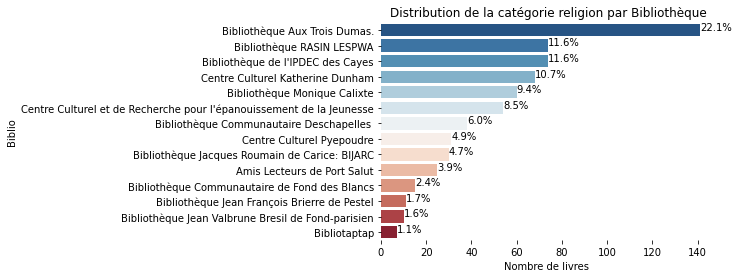

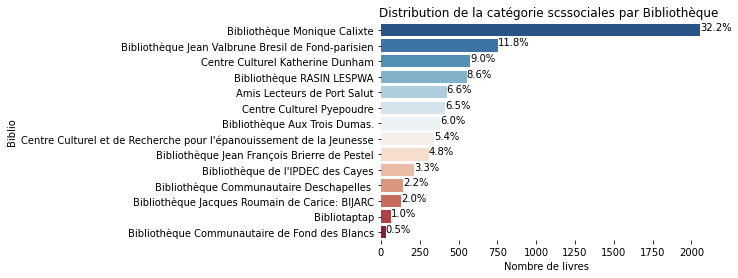

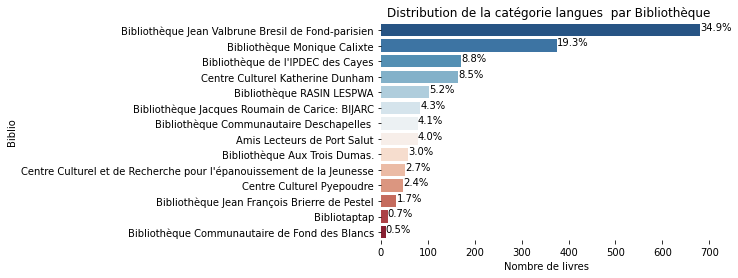

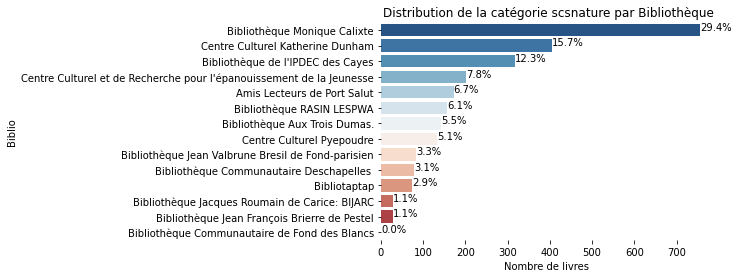

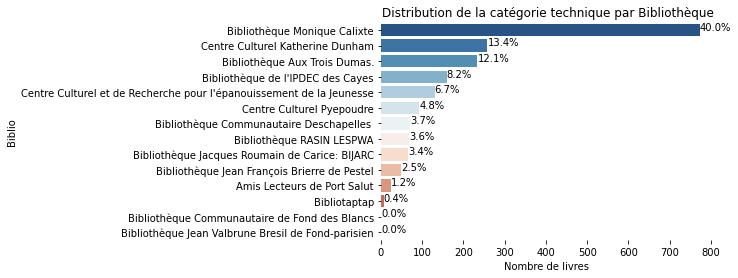

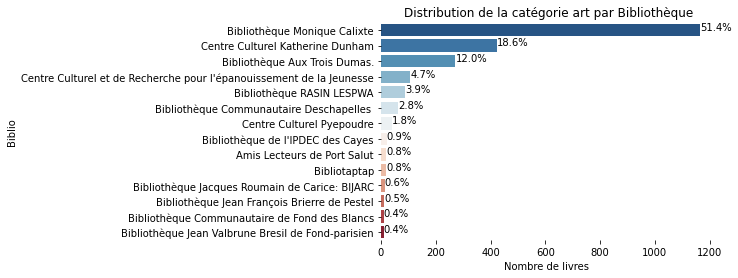

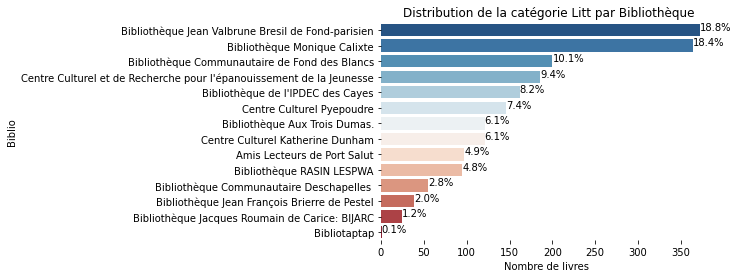

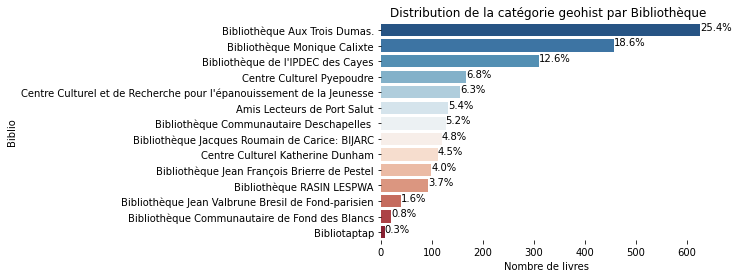

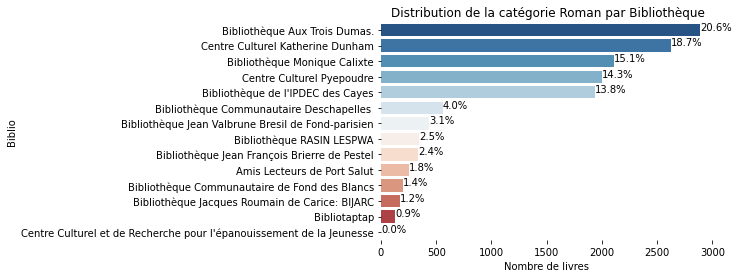

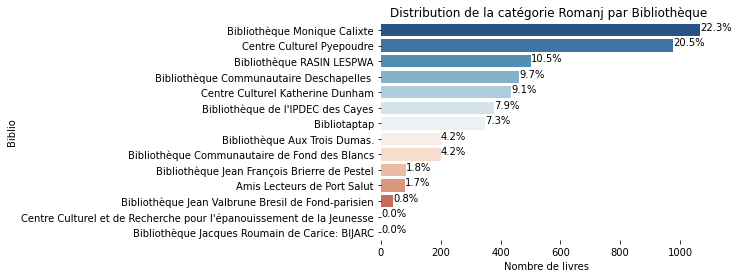

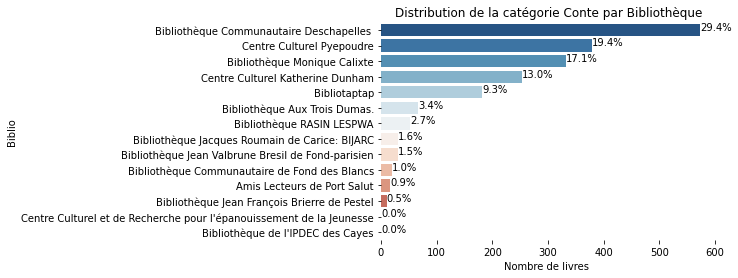

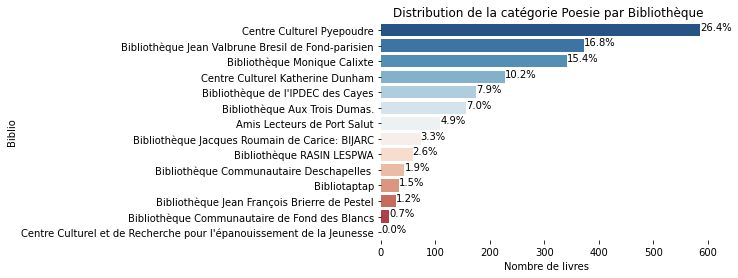

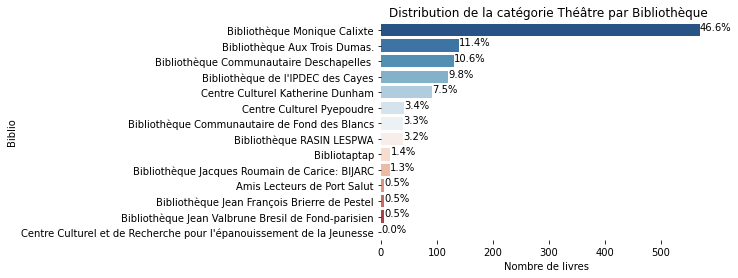

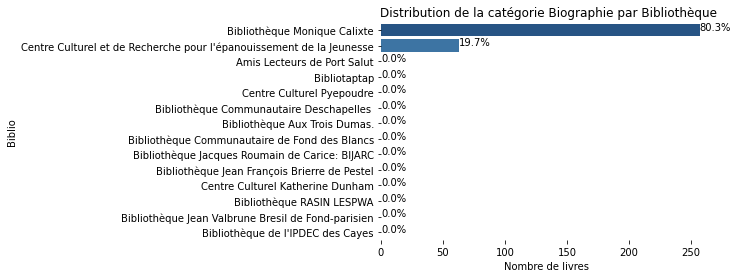

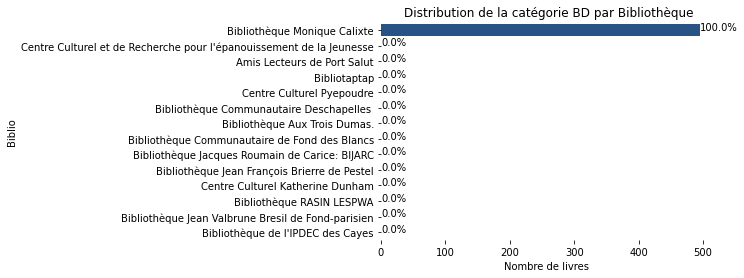

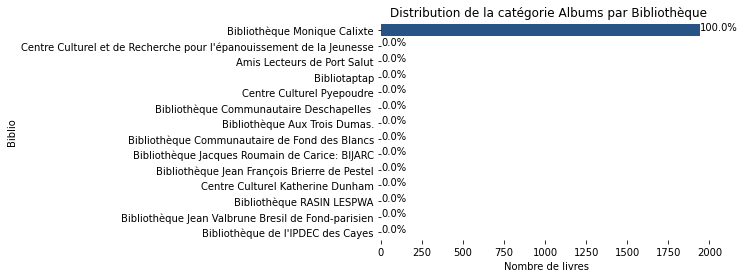

In [157]:
#Distribution en pourcentage
for i in listet2:
    df2=df1.sort_values(by=i, ascending=False)
    plt.figure()
    bar_pousantaj(i,'Biblio',df2,'Distribution de la catégorie {} par Bibliothèque'.format(i),'RdBu_r')   

#### Distribution Categorie haitienne par Biblio

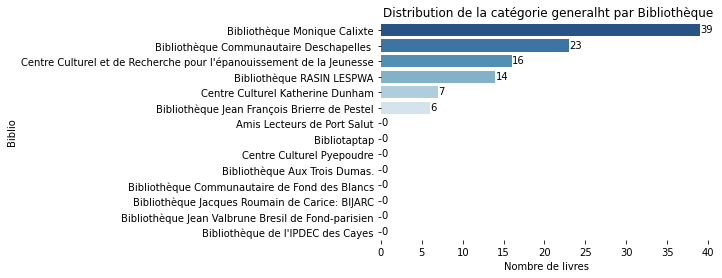

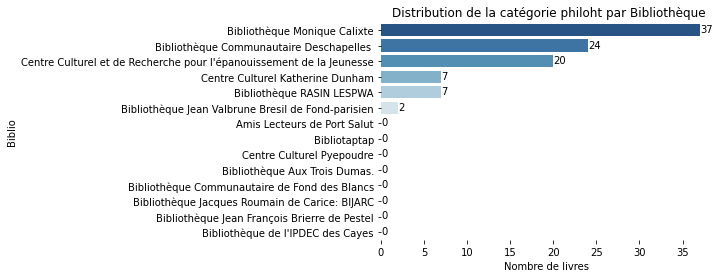

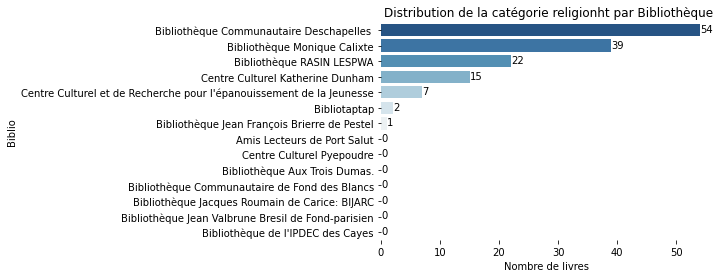

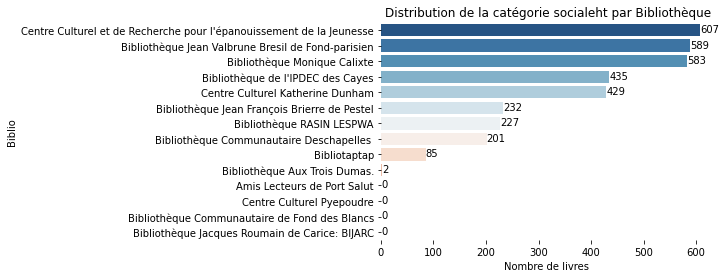

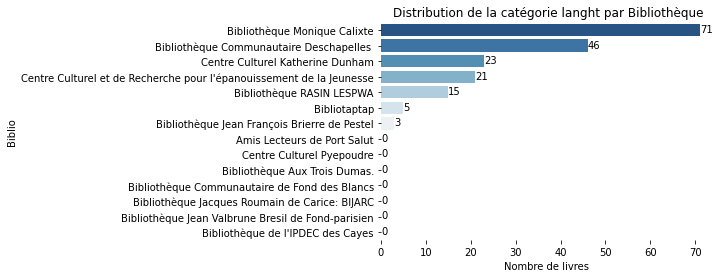

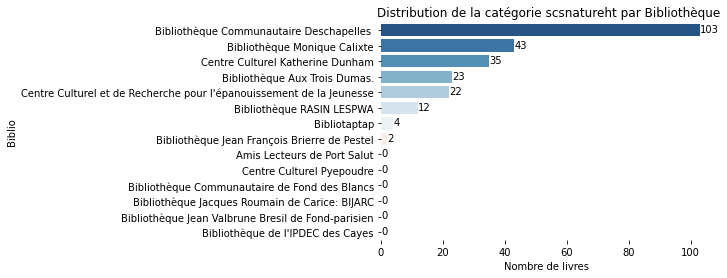

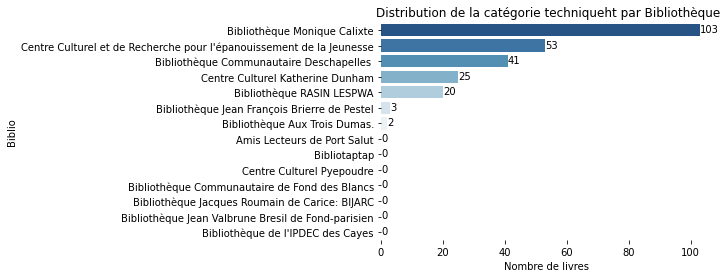

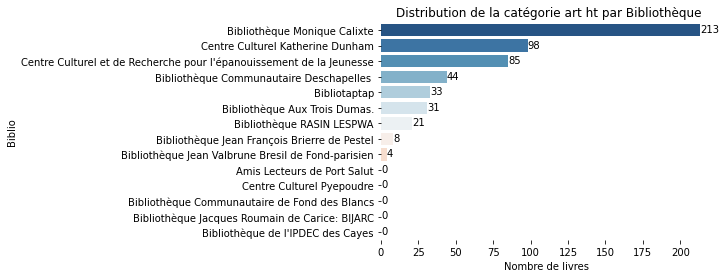

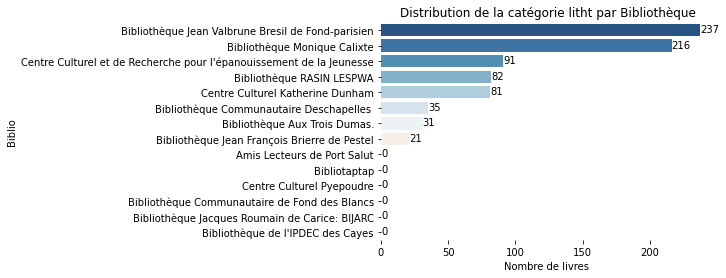

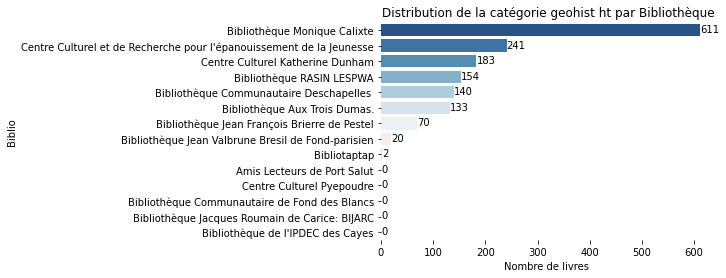

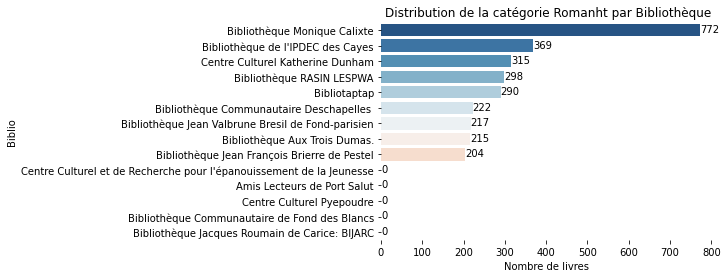

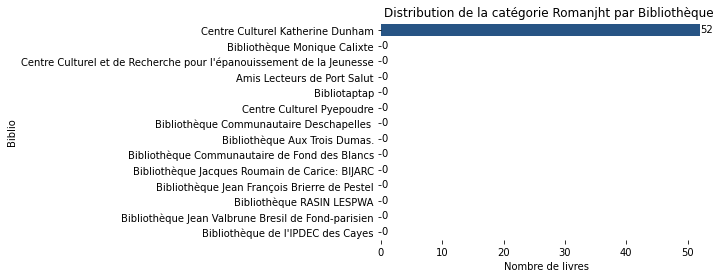

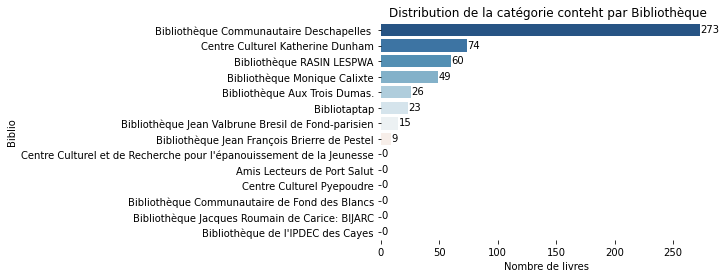

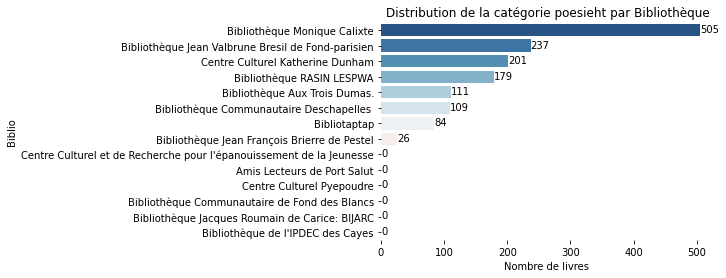

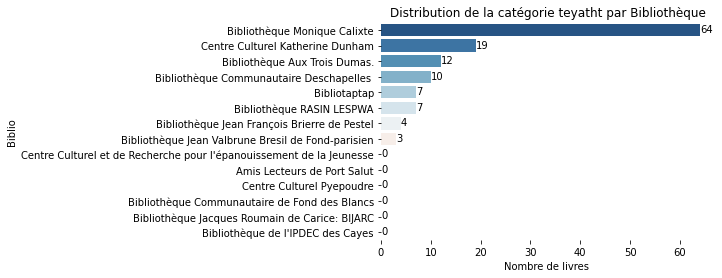

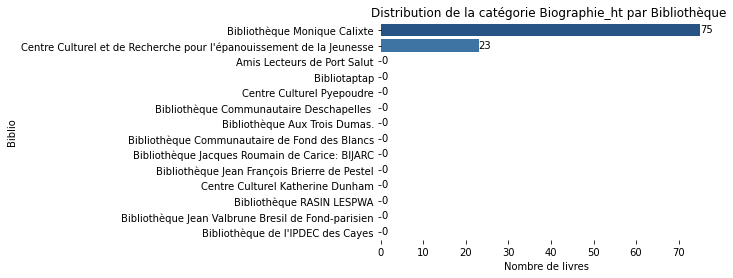

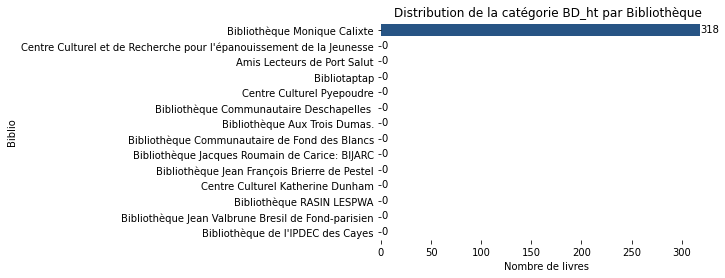

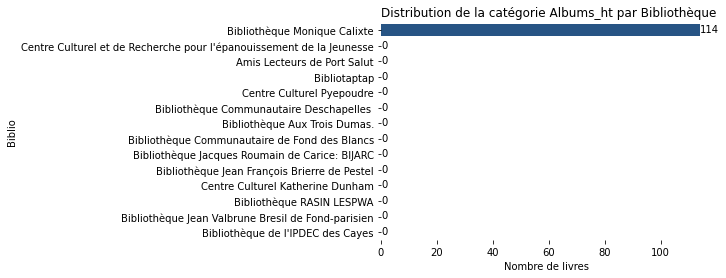

In [158]:
#Distribution en quantité réelle
for i in listht2:
    df21=df2.sort_values(by=i, ascending=False)
    plt.figure()
    bar_kantite(i,'Biblio',df21,'Distribution de la catégorie {} par Bibliothèque'.format(i),'RdBu_r') 

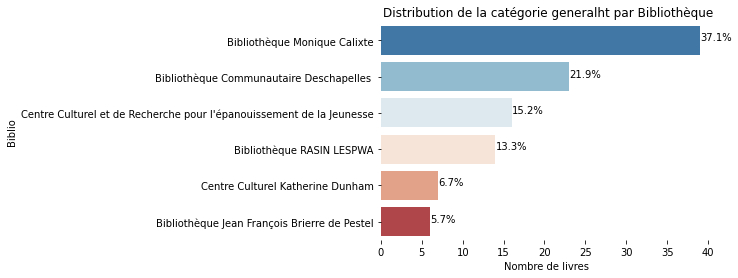

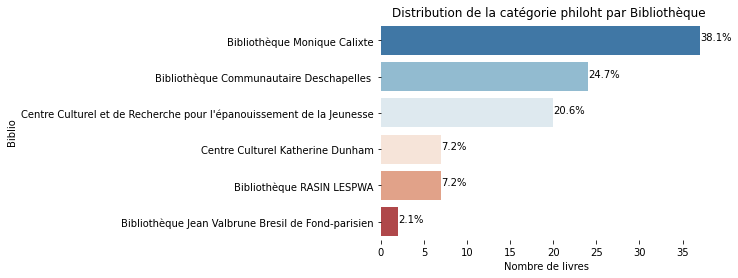

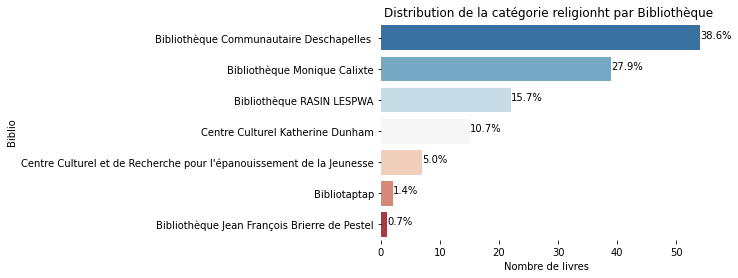

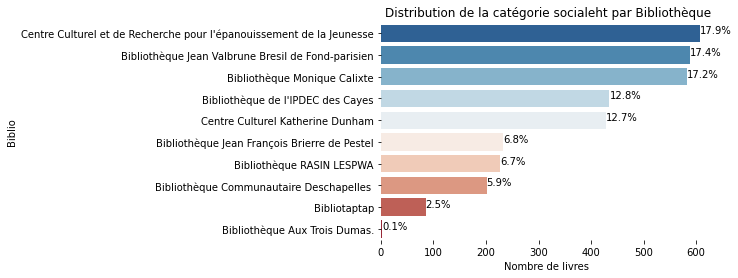

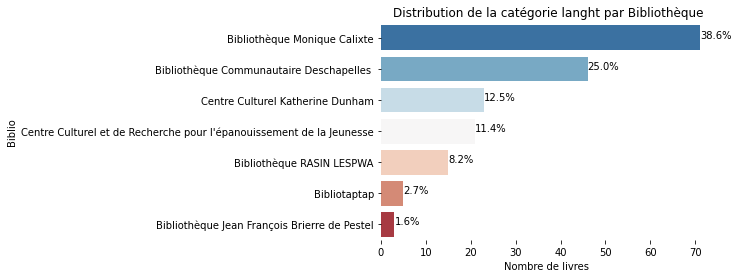

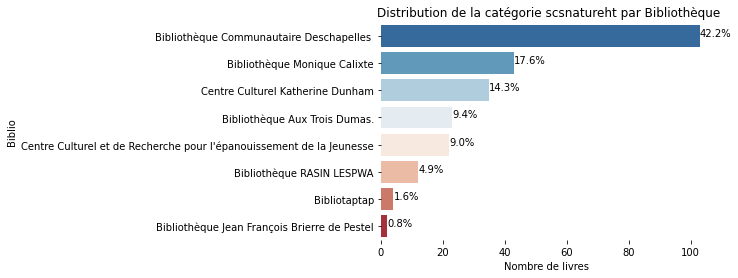

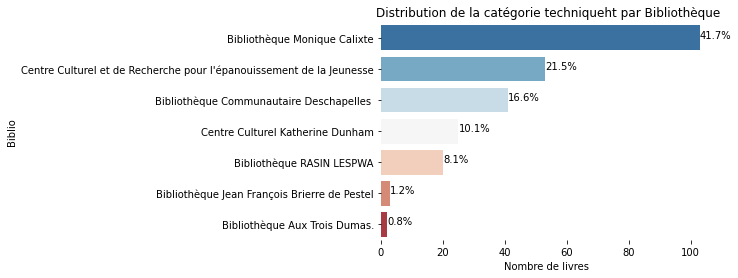

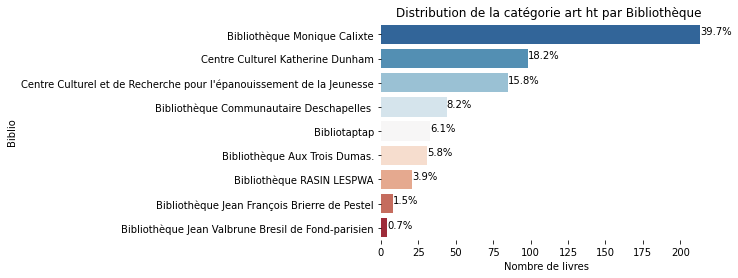

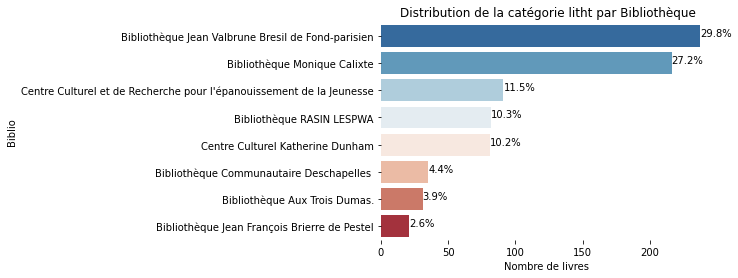

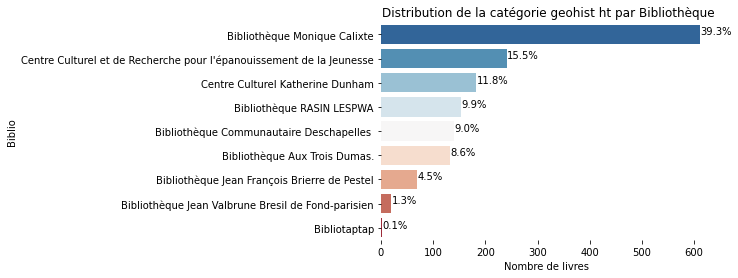

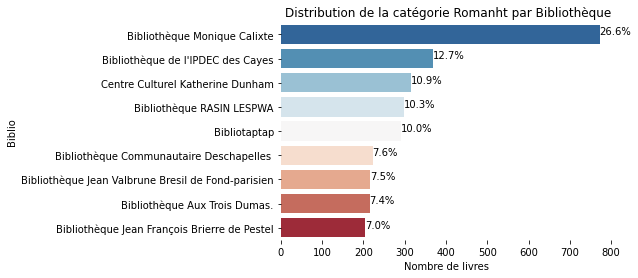

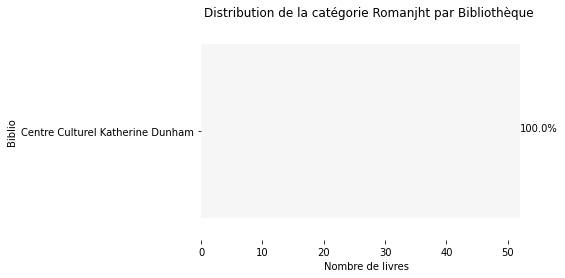

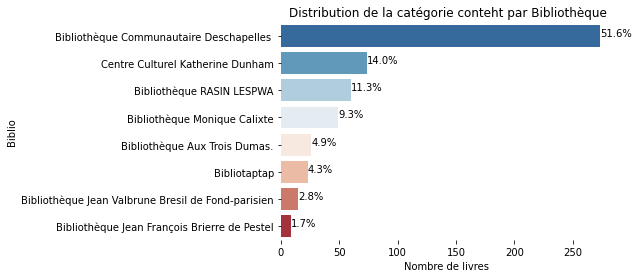

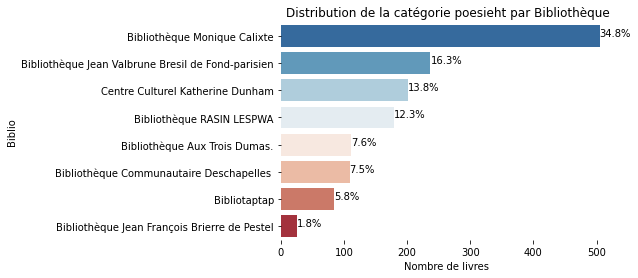

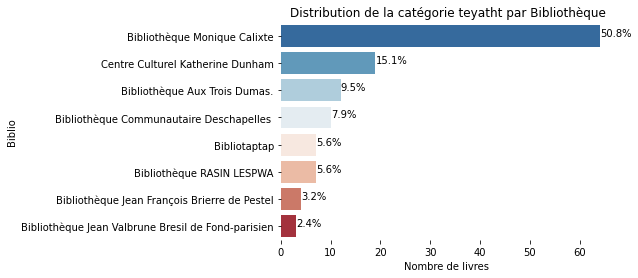

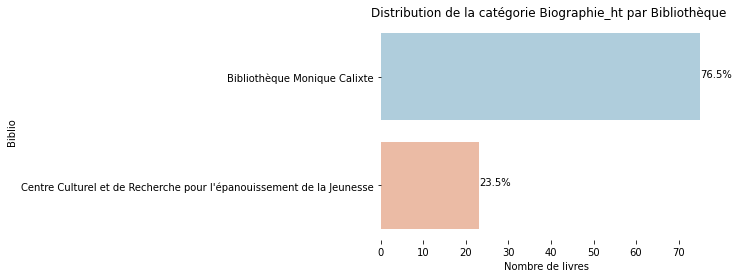

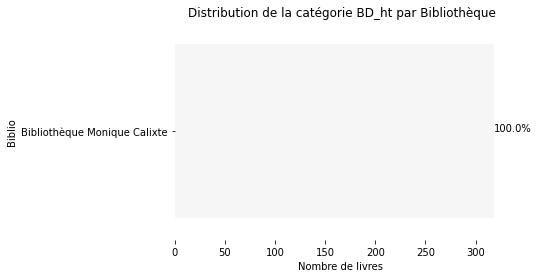

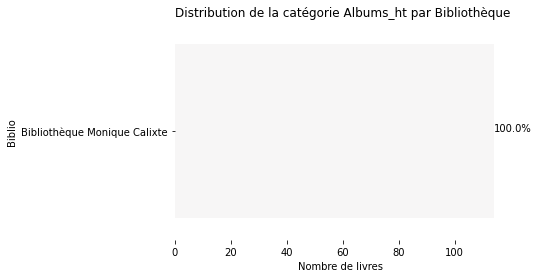

In [159]:
#Distribution en pourcentage
for i in listht2:
    df22=df4.sort_values(by=i, ascending=False)
    dfindex=df22[df22[i]==0].index
    df81=df22.drop(dfindex)
    plt.figure()
    bar_pousantaj(i,'Biblio',df81,'Distribution de la catégorie {} par Bibliothèque'.format(i),'RdBu_r')   

#### Distribution des livres dans chaque biblio

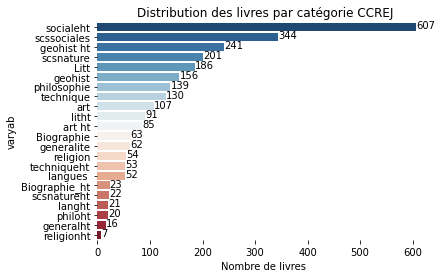

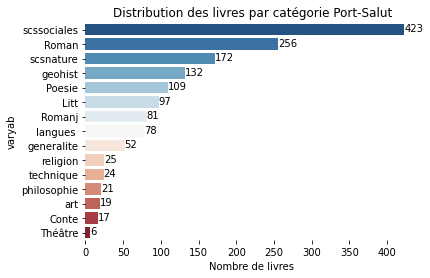

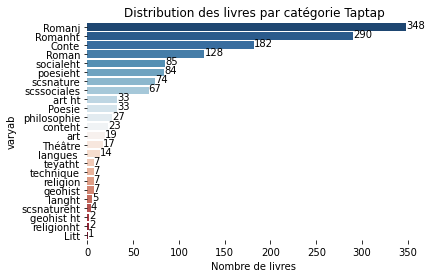

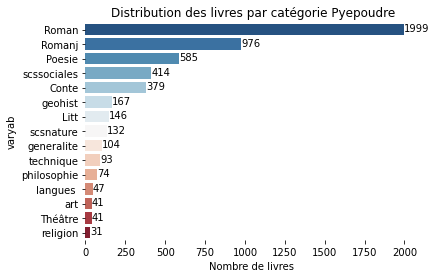

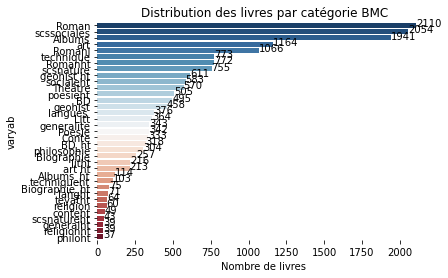

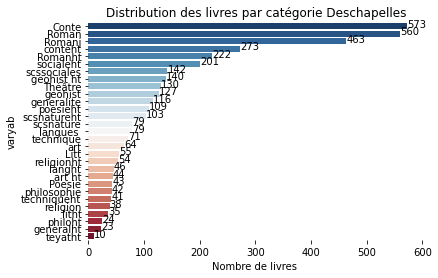

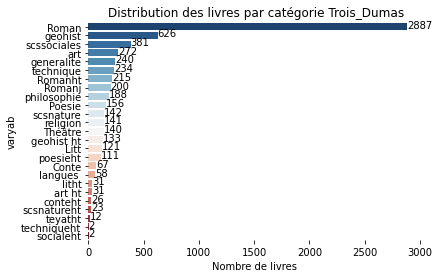

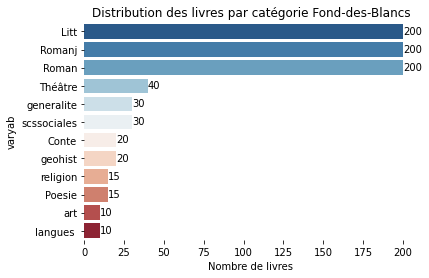

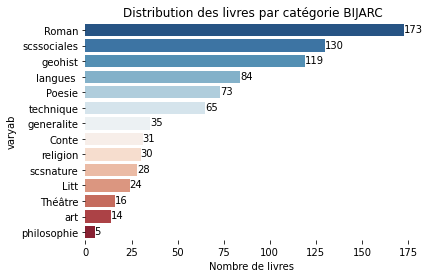

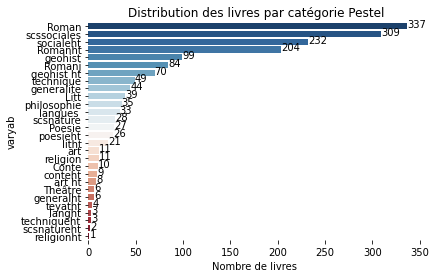

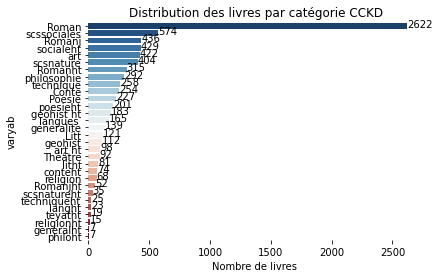

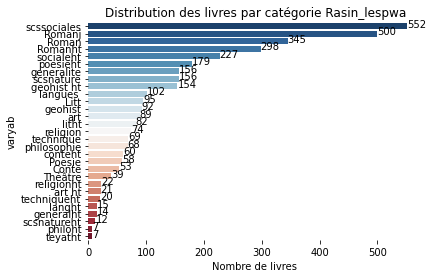

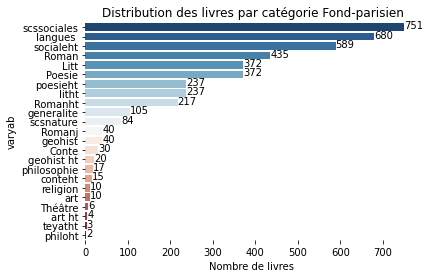

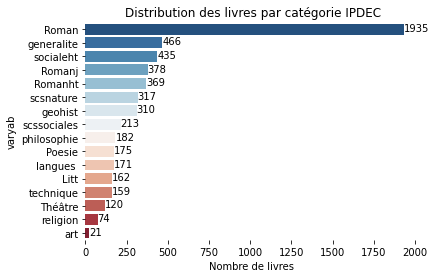

In [160]:
#Distribution en quantité réelle
for i in colbiblio2:
    df2=df6.sort_values(by=i, ascending=False)
    dfindex=df2[df2[i]==0].index
    df9=df2.drop(dfindex)
    plt.figure()
    bar_kantite(i,'varyab',df9,'Distribution des livres par catégorie {}'.format(i),'RdBu_r')   

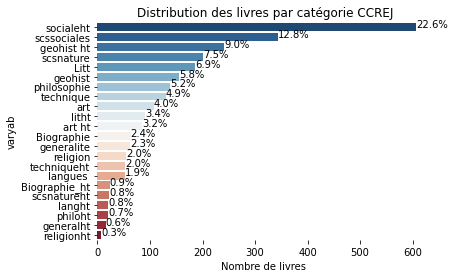

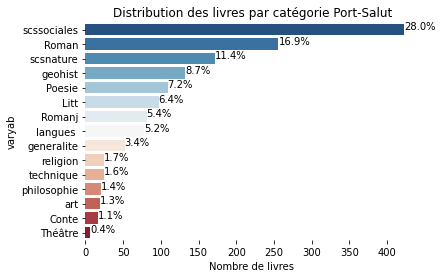

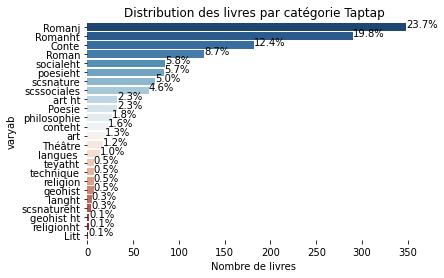

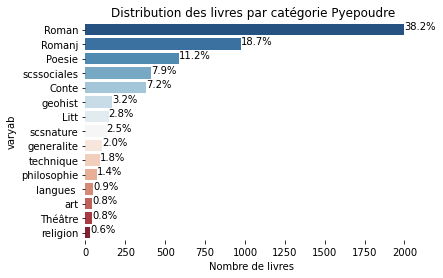

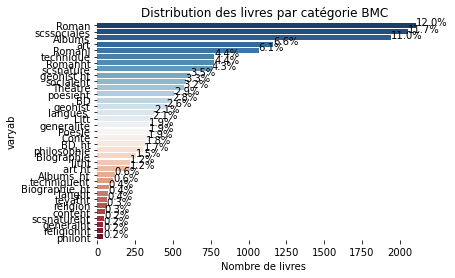

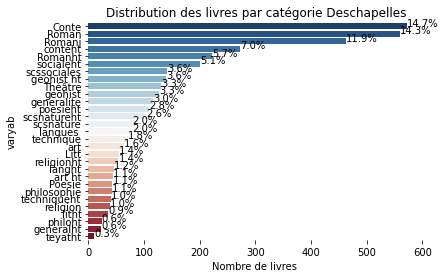

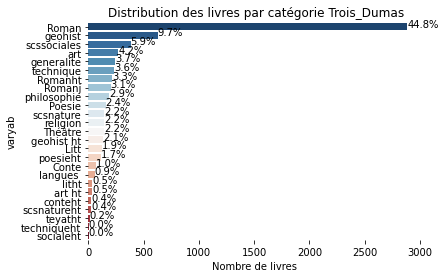

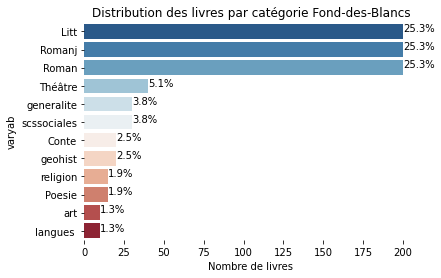

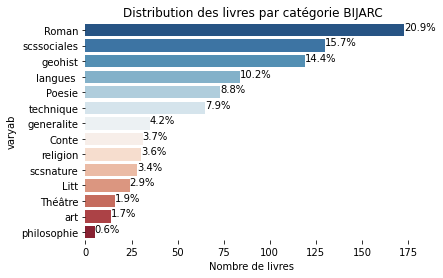

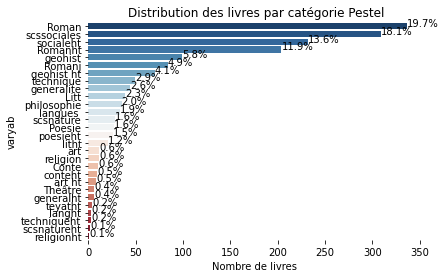

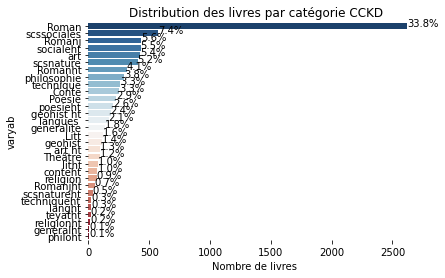

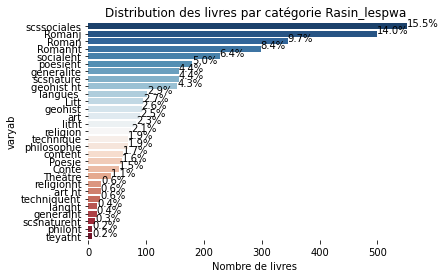

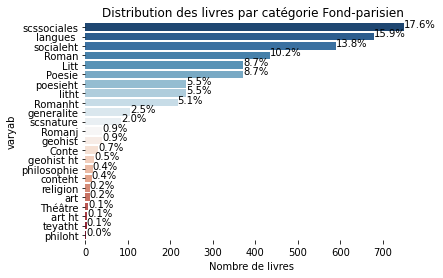

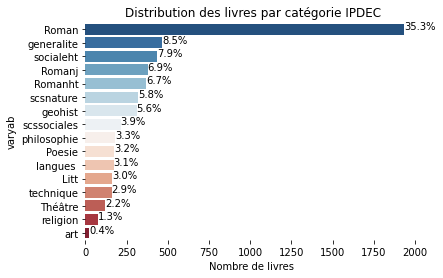

In [161]:
#Distribution en pousantaj
for i in colbiblio2:
    df23=df6.sort_values(by=i, ascending=False)
    dfindex=df23[df23[i]==0].index
    df10=df23.drop(dfindex)
    plt.figure()
    bar_pousantaj(i,'varyab',df10,'Distribution des livres par catégorie {}'.format(i),'RdBu_r')   

#### Distribution de la collection etrangere de chaque biblio

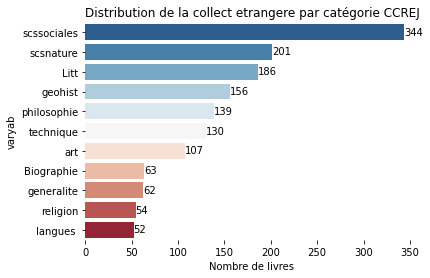

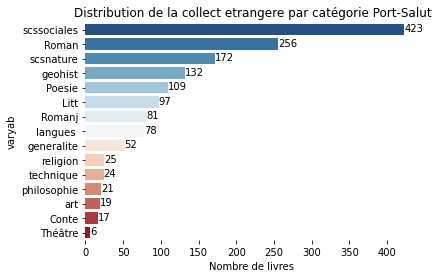

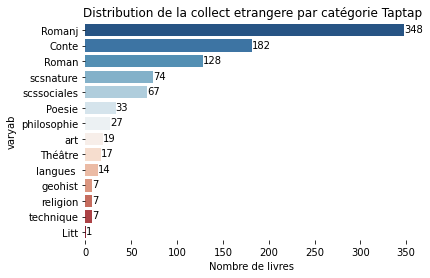

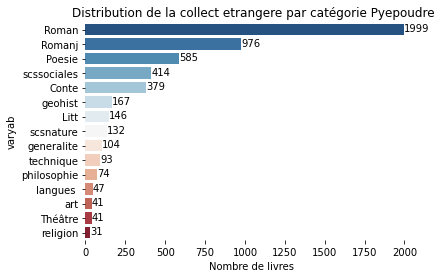

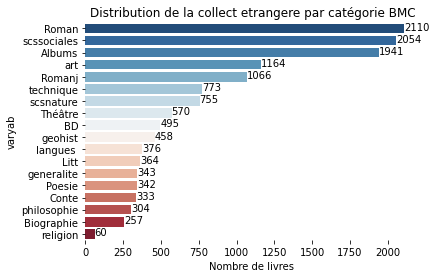

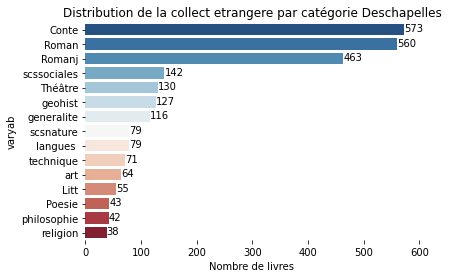

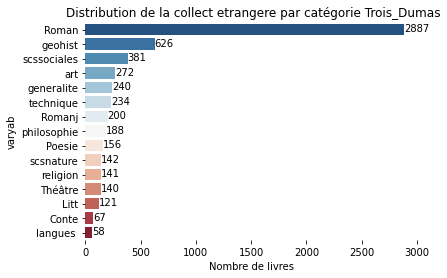

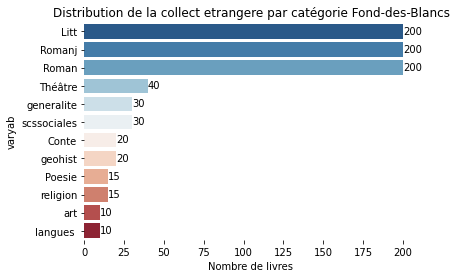

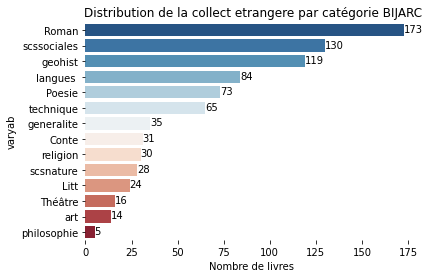

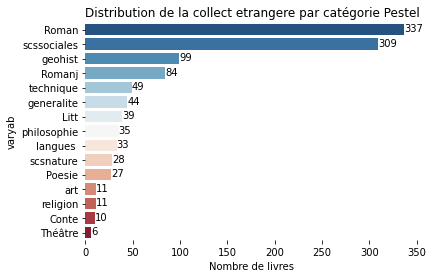

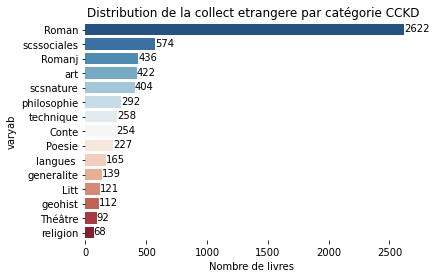

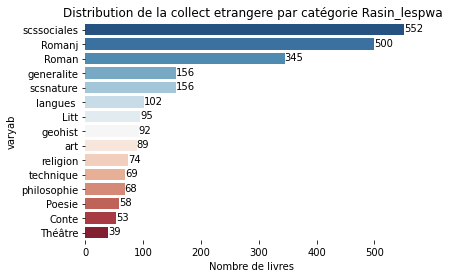

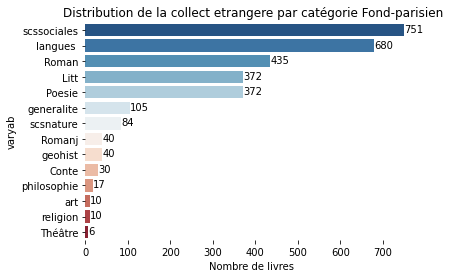

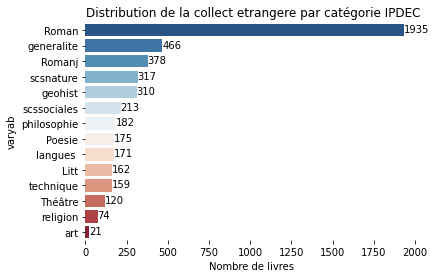

In [162]:
#Distribution en quantité réelle
for i in colbiblio2:
    df2=dfetr.sort_values(by=i, ascending=False)
    dfindex=df2[df2[i]==0].index
    df90=df2.drop(dfindex)
    plt.figure()
    bar_kantite(i,'varyab',df90,'Distribution de la collect etrangere par catégorie {}'.format(i),'RdBu_r')   

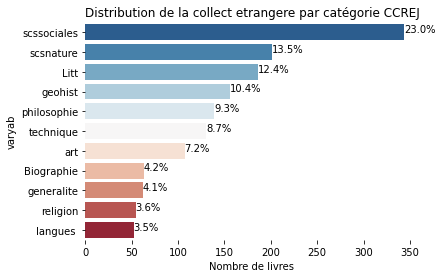

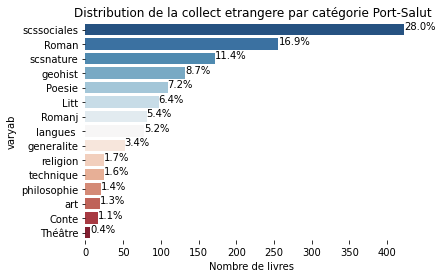

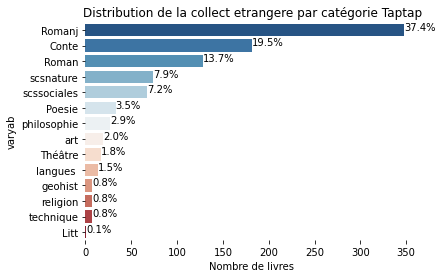

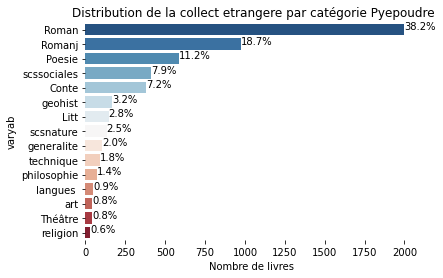

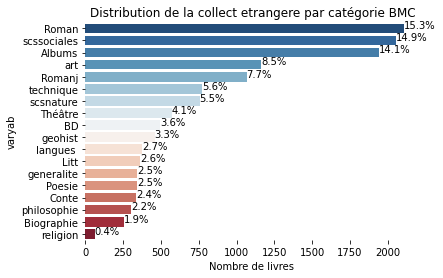

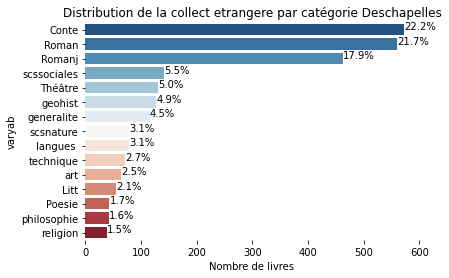

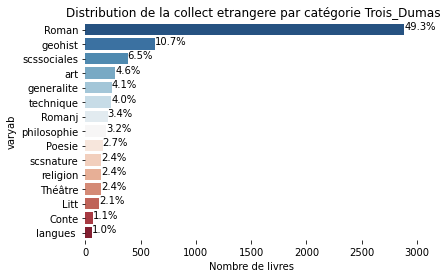

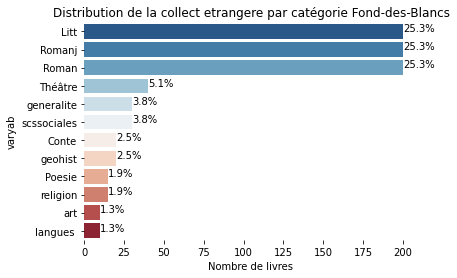

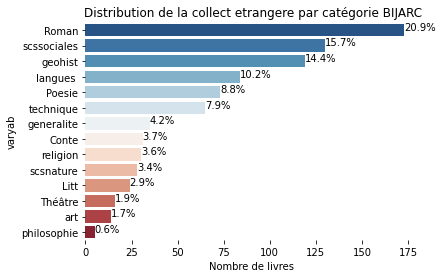

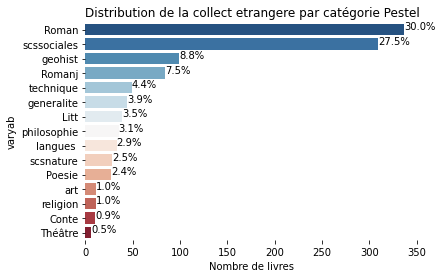

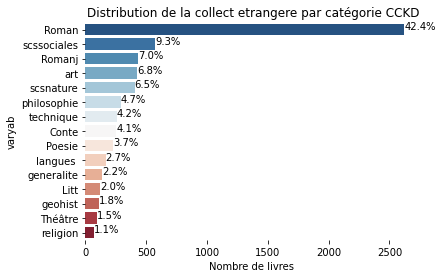

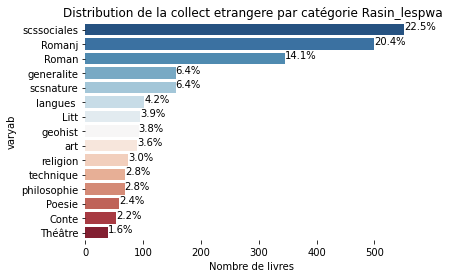

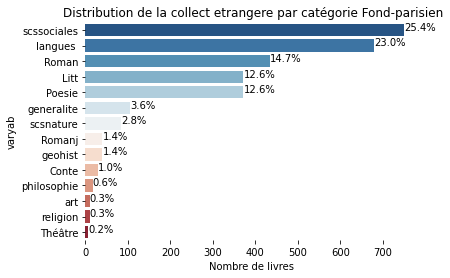

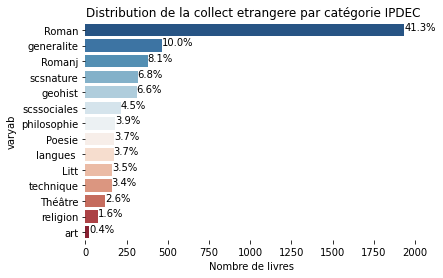

In [163]:
#Distribution en pourcentage
for i in colbiblio2:
    df2=dfetr.sort_values(by=i, ascending=False)
    dfindex=df2[df2[i]==0].index
    df91=df2.drop(dfindex)
    plt.figure()
    bar_pousantaj(i,'varyab',df91,'Distribution de la collect etrangere par catégorie {}'.format(i),'RdBu_r')   

#### Distribution de la collection haitienne de chaque biblio

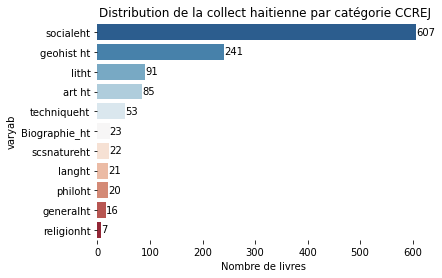

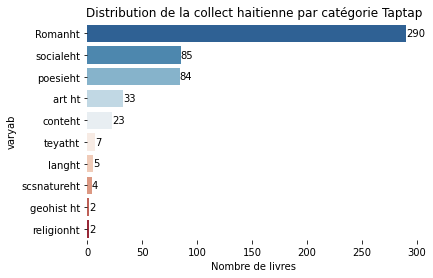

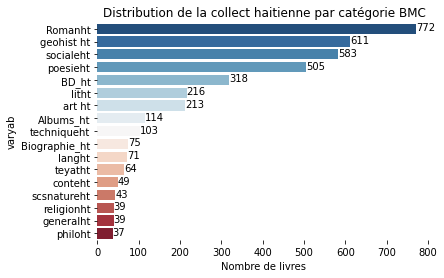

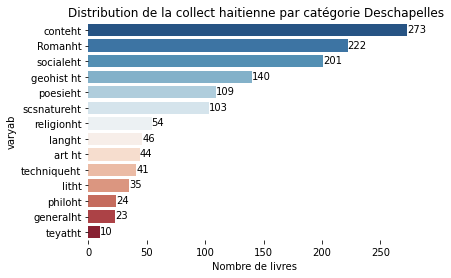

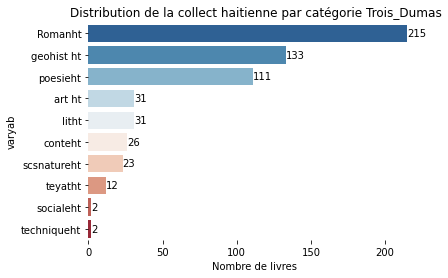

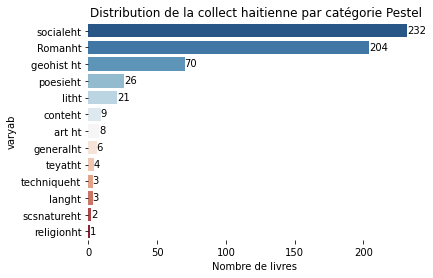

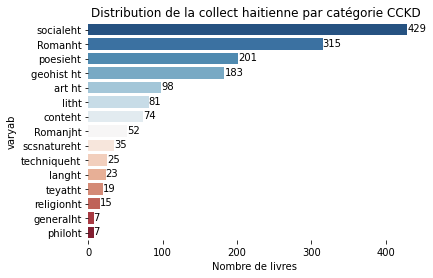

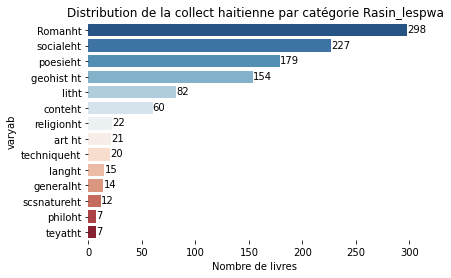

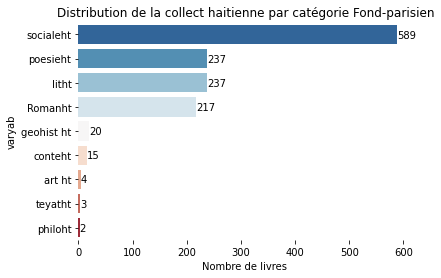

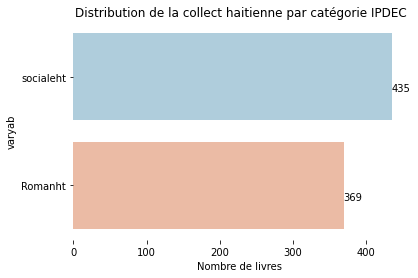

In [164]:
#Distribution en quantité réelle
for i in colbiblioht:
    df2=dfht.sort_values(by=i, ascending=False)
    dfindex=df2[df2[i]==0].index
    df92=df2.drop(dfindex)
    plt.figure()
    bar_kantite(i,'varyab',df92,'Distribution de la collect haitienne par catégorie {}'.format(i),'RdBu_r')   

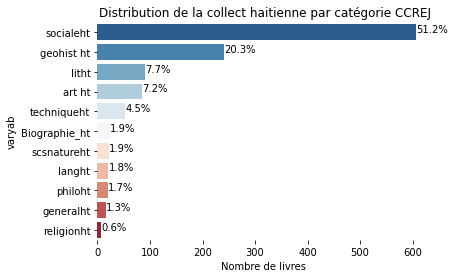

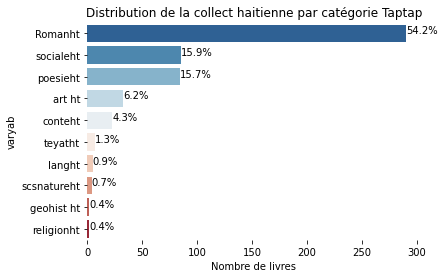

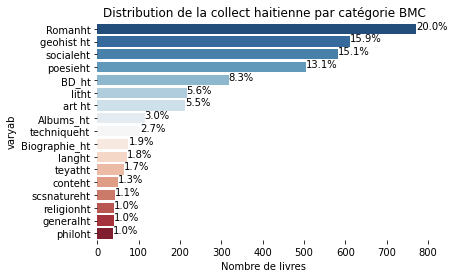

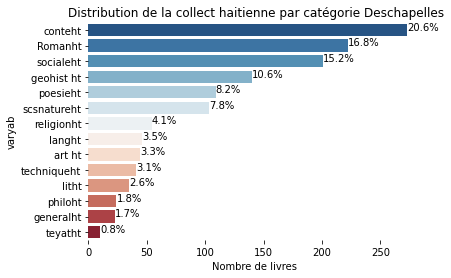

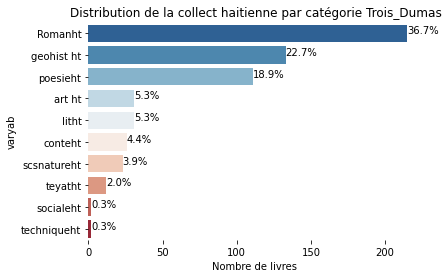

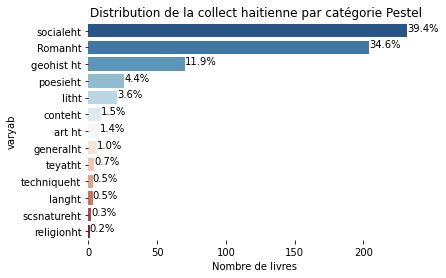

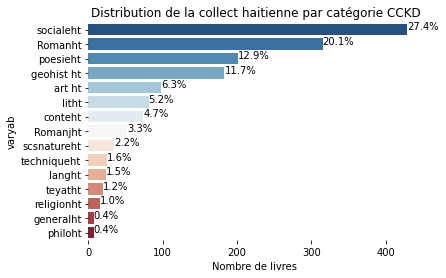

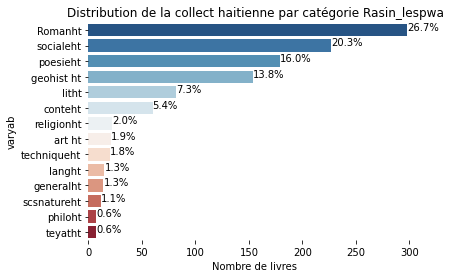

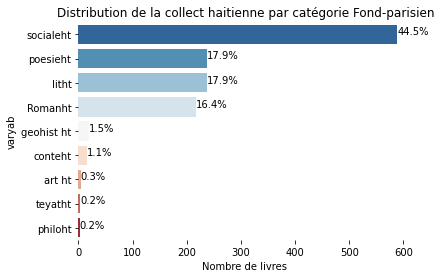

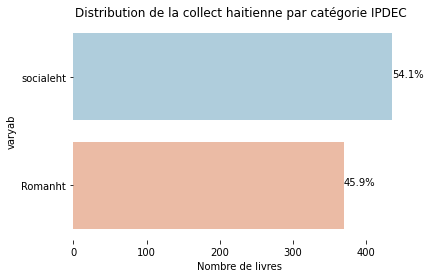

In [165]:
#Distribution en pourcentage
for i in colbiblioht:
    df24=dfht.sort_values(by=i, ascending=False)
    dfindex=df24[df24[i]==0].index
    df93=df24.drop(dfindex)
    plt.figure()
    bar_pousantaj(i,'varyab',df93,'Distribution de la collect haitienne par catégorie {}'.format(i),'RdBu_r')   

In [166]:
df1.describe()

Nbre_livres  nbr_livres_etr  nbr_livres_ht  generalite  generalht  \
count     14.000000       14.000000      14.000000   14.000000  14.000000   
mean    4518.357143     3598.142857     920.214286  135.142857   7.500000   
std     4346.813450     3501.044874    1008.310024  131.931717  11.765334   
min      790.000000      790.000000       0.000000    0.000000   0.000000   
25%     1561.750000     1215.000000     133.750000   46.000000   0.000000   
50%     3736.500000     2515.000000     696.500000  104.500000   0.000000   
75%     5422.500000     5092.500000    1289.500000  151.750000  12.250000   
max    17617.000000    13765.000000    3852.000000  466.000000  39.000000   

       philosophie    philoht    religion  religionht  scssociales  ...  \
count    14.000000  14.000000   14.000000   14.000000     14.00000  ...   
mean     99.571429   6.928571   45.571429   10.000000    456.00000  ...   
std     104.233255  11.684732   36.504403   17.097008    504.06944  ...   
min       0.000000   0.000000    7.000000    0.000000     30.00000  ...   
25%      22.500000   0.000000   17.500000    0.000000    159.75000  ...   
50%      55.000000   0.000000   34.500000    0.500000    362.50000  ...   
75%     171.250000   7.000000   66.000000   13.000000    519.75000  ...   
max     304.000000  37.000000  141.000000   54.000000   2054.00000  ...   

           Poesie    poesieht     Théâtre    teyatht  Biographie  \
count   14.000000   14.000000   14.000000  14.000000   14.000000   
mean   158.214286  103.714286   87.357143   9.000000   22.857143   
std    170.538594  142.768467  147.513028  16.847734   69.450433   
min      0.000000    0.000000    0.000000   0.000000    0.000000   
25%     35.500000    0.000000    8.500000   0.000000    0.000000   
50%     91.000000   55.000000   39.500000   3.500000    0.000000   
75%    214.000000  162.000000  113.000000   9.250000    0.000000   
max    585.000000  505.000000  570.000000  64.000000  257.000000   

       Biographie_ht          BD       BD_ht       Albums   Albums_ht  
count       14.00000   14.000000   14.000000    14.000000   14.000000  
mean         7.00000   35.357143   22.714286   138.642857    8.142857  
std         20.50891  132.294315   84.989075   518.754071   30.467782  
min          0.00000    0.000000    0.000000     0.000000    0.000000  
25%          0.00000    0.000000    0.000000     0.000000    0.000000  
50%          0.00000    0.000000    0.000000     0.000000    0.000000  
75%          0.00000    0.000000    0.000000     0.000000    0.000000  
max         75.00000  495.000000  318.000000  1941.000000  114.000000  

[8 rows x 39 columns]